# Dynamics of quantum walk on glued tree

In [3]:
from glue_tree import *
from plot_config import *


from qiskit.quantum_info import DensityMatrix, Statevector, SparsePauliOp, Operator, partial_trace, entropy, schmidt_decomposition
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import expm_multiply
from scipy.linalg import svd

In [10]:
def evolve(H: csr_matrix, n: int, t: float):
    N = 2*n + 1
    psi0 = np.zeros(N, dtype=complex)
    psi0[0] = 1.0
    psi_t = expm_multiply(-1j * H, psi0, start=0.0, stop=t, num=2)[-1]
    # evolve_entropy(H, psi0, t) 
    # to return entropy
    return np.abs(psi_t)**2

def vn_entropy(psi: np.ndarray, dims: (int, int)):
    dA, dB = dims
    psi_matrix = psi.reshape(dA, dB)
    # Singular values = Schmidt coefficients
    U, D, Vt = svd(psi_matrix, full_matrices=False)
    D = D / np.linalg.norm(D)
    l = D**2
    S = -np.sum(l * np.log(l) / np.log(2))
    return S

def evolve_entropy(L: csr_matrix, psi: np.ndarray, t: float):
    entropy_list = [] 
    t_list = np.linspace(0, t, t) 
    
    for t in t_list: 
        psi_t = expm_multiply(-1j * L * t, psi)
        S = vn_entropy(psi_t, (77, 13))
        entropy_list.append(S)
    
    plt.plot(t_list, entropy_list, label='entropy')
        
    plt.xlabel(rf'Evolution Time $t$')
    plt.ylabel('Entanglement entropy')
    plt.show()

def plot_prob(probs, n, t):
    x = np.arange(0, 2*n+1)
    plt.plot(x, probs, linewidth=0.5)
    plt.xlabel("column")
    plt.ylabel("probability")
    plt.title(f" t={int(t)}")
    plt.xlim(0, 2*n)
    plt.margins(y=0)
    plt.show()


In [11]:
def column_laplacian_H(n: int) -> csr_matrix:
    N = 2*n + 1
    off = np.full(N-1, -np.sqrt(2.0), dtype=float)
    # print(off)
    A = diags([off, off], offsets=[-1,1], shape=(N,N), format="csr")
    degrees = np.zeros(N, dtype=float)
    degrees[:] = 3
    degrees[0], degrees[n], degrees[N-1] = 2, 2, 2
    D = diags([degrees], [0], shape=(N,N), format="csr")
    # print(A+D)
    return (A + D).tocsr()

$S(\rho)= -Tr[\rho \log \rho] = - \sum (\lambda_i * \log \lambda_i)$

$\psi = U @ diag(s) @ V$

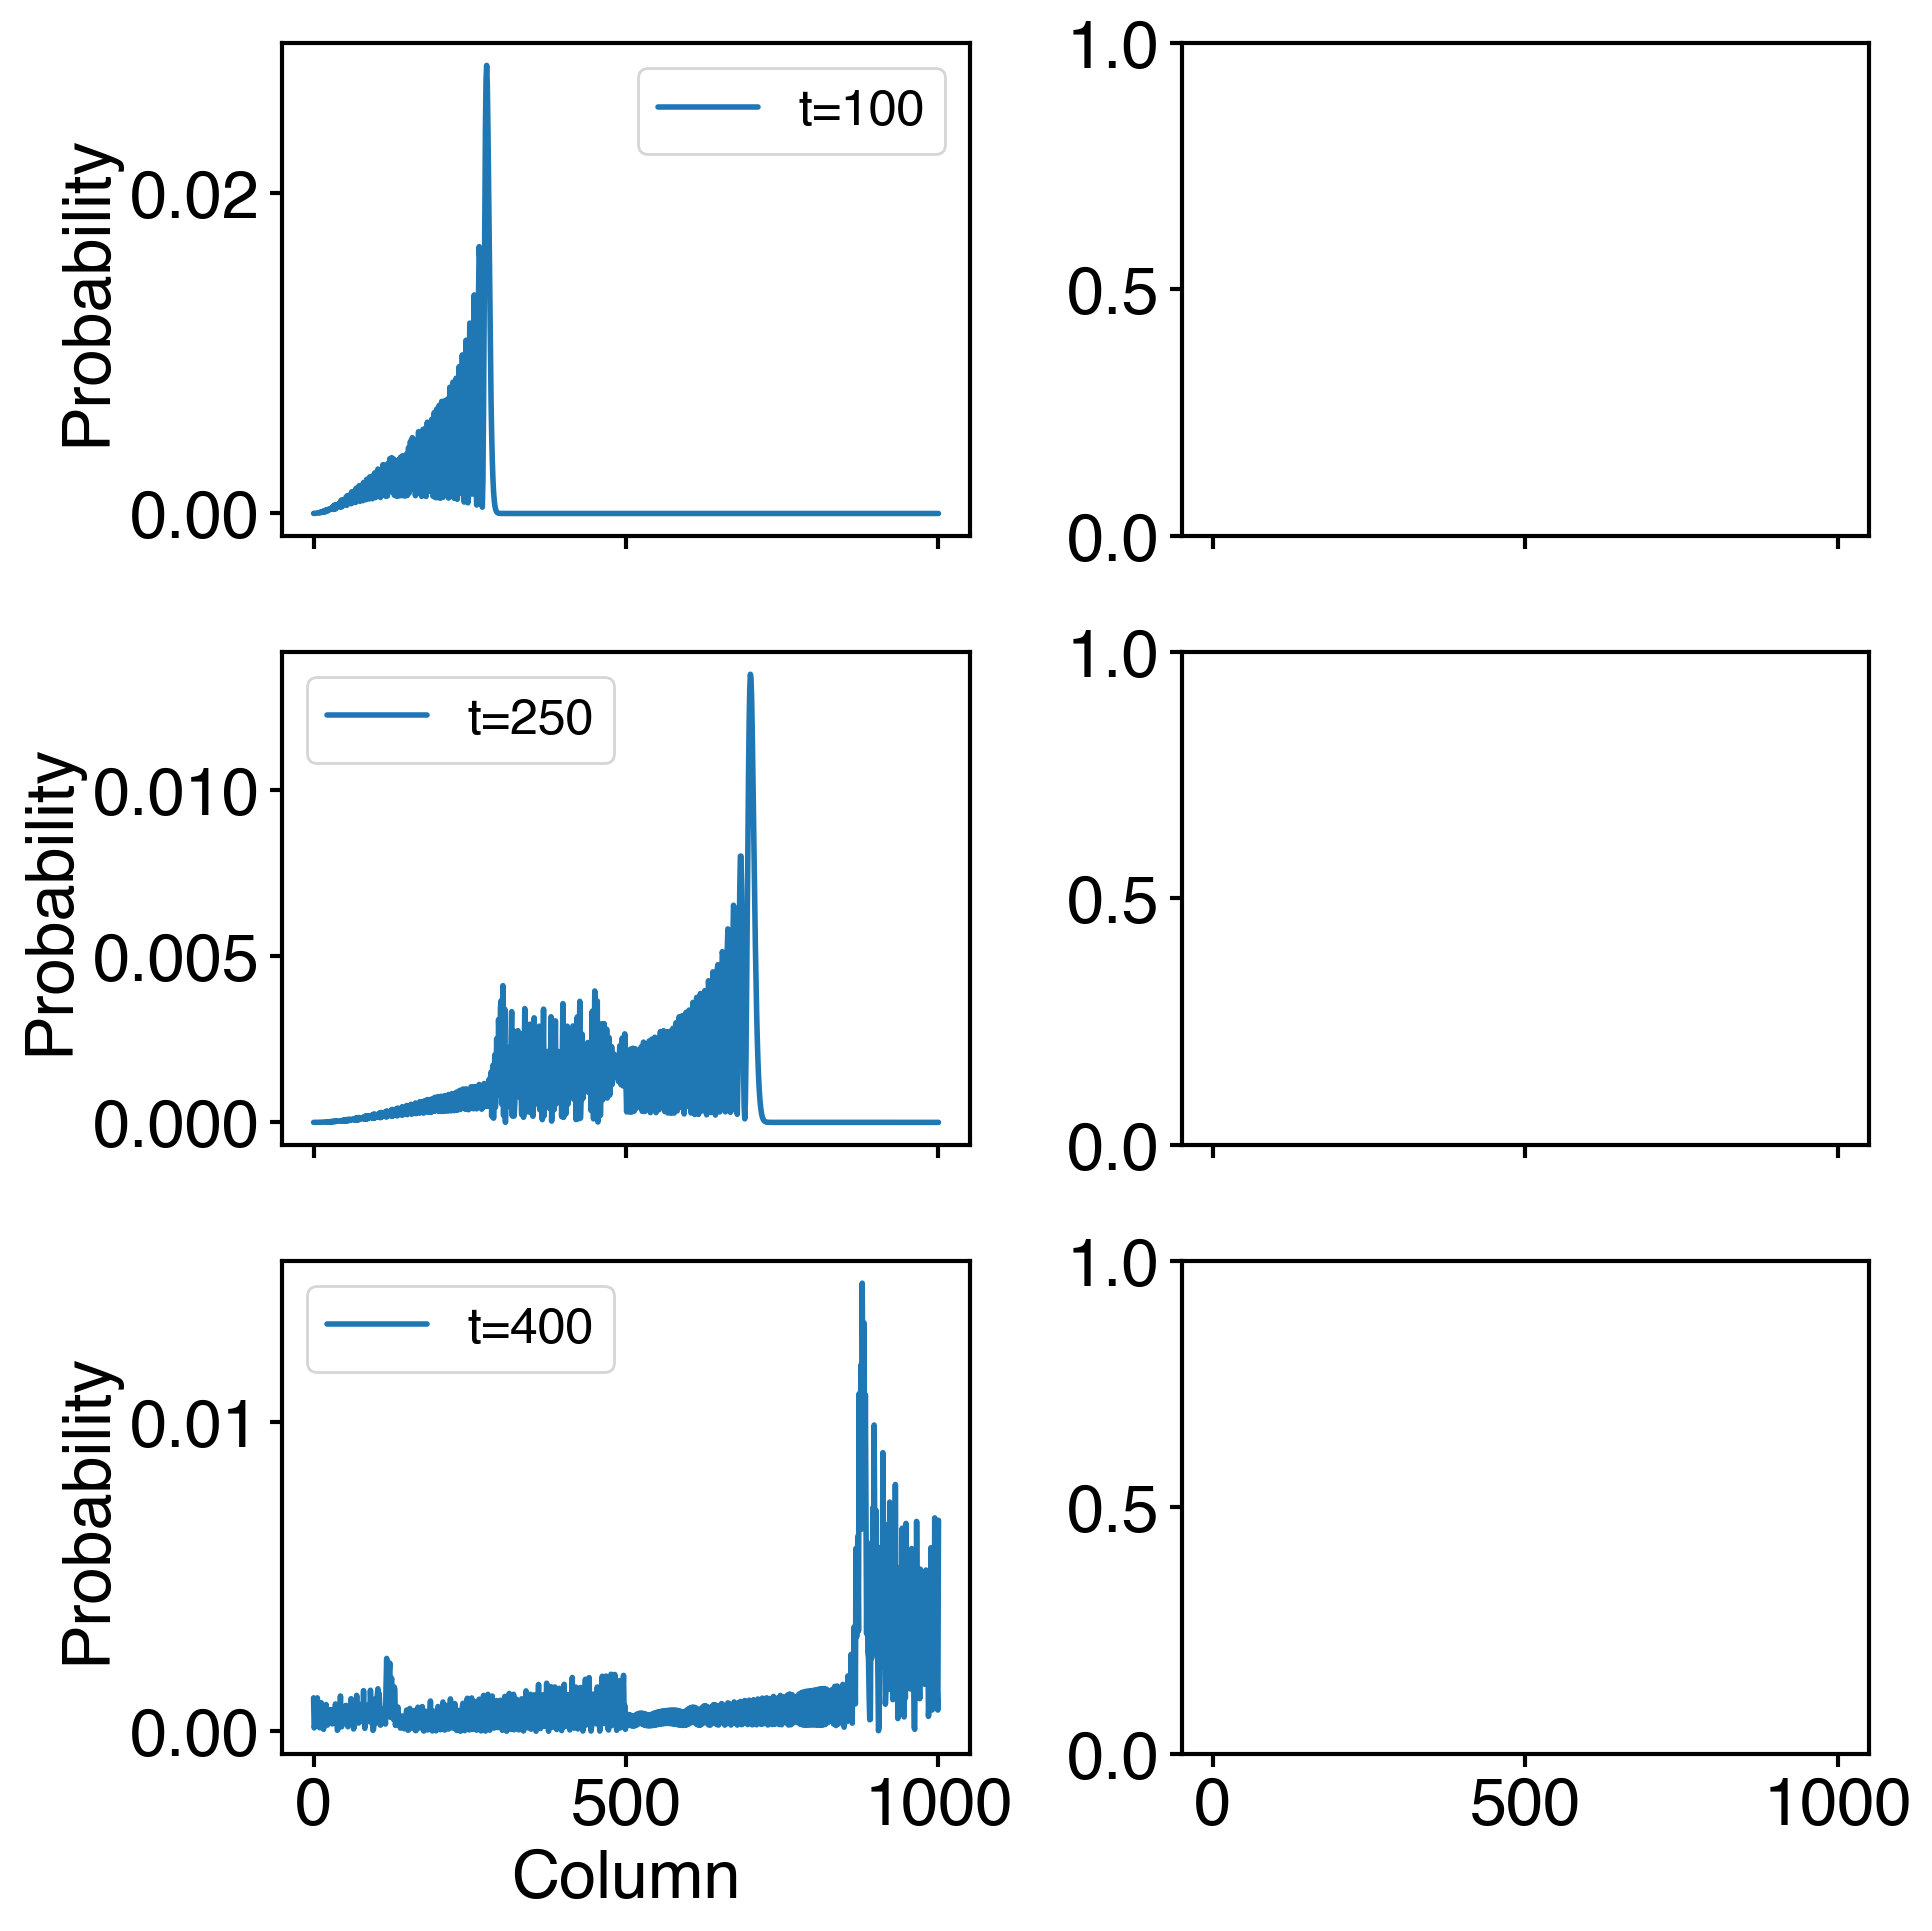

In [20]:
n = 500
# H = column_A(n)
H = column_laplacian_H(n)
p_100 = evolve(H, n, 100)
p_250 = evolve(H, n, 250)
p_400 = evolve(H, n, 400)

x = np.arange(0, 2*n+1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), sharex=True)
axes[0, 0].plot(x, p_100, label='t=100')
axes[1, 0].plot(x, p_250, label='t=250')
axes[2, 0].plot(x, p_400, label='t=400')
axes[2, 0].set_xlabel("Column")
for i in range(3):
    axes[i, 0].set_ylabel("Probability")
    axes[i, 0].legend()